In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from scipy.stats import gaussian_kde
from pydoc import help
from scipy.stats.stats import pearsonr
from sklearn.metrics import explained_variance_score
from scipy.stats import wilcoxon
import warnings
import os
import glob
warnings.filterwarnings('ignore')
from __future__ import print_function, division

Populating the interactive namespace from numpy and matplotlib


In [2]:
direc = './'

# empty list to store the list of csv files
filelist =[]

# empty lists to put the results into
n_trees = []
r2_list = []
rmse_list = []
pRMSE_list = []
variance_list = []
Bias_list = []
n_samples =[]


# file pattern to search for in the directory.
pattern = "%sPredictedANDobserved_*" % direc

# return a list of files matching the pattern "csv" in the directry 
file1 = glob.glob(pattern)

for path in file1:
    a = path[2:]
    filelist.append(a)

# loop through the list of csv files and opens them as dataframes and selectes the rmse results and transforms them and returns them to a list
for filename in filelist:


    # import the raw results and calculate the statstics
    n_t = int(filename[22:-4])
    n_trees.append(n_t)
    dfa = pd.read_csv(filename, header=None)# reads the csv file
    # sort out the outputs into two colums of data to calculate the stats
    pred =  dfa[dfa.columns[0:20]]
    obs = dfa[dfa.columns[20:]]
    
    # stack the results of the 20 runs on top of each other 
    st_pred = pred.stack()
    st_obs = obs.stack()
    
    a = st_pred.values
    b = st_obs.values
    
    df = pd.DataFrame([a,b]).T
    df.columns=['predicted','observed']
    
    # selects the model using the spectral predictor variables 
    y = df.observed.values
    x = df.predicted.values
    df['res_L5'] = df['observed'] - df['predicted']
    sumRes = df['res_L5'].sum()
    """
    code to calculate the pearson's correlation coefficient and the coefficient of determination, 
    the for loop extracts out the correlatin coeffiecent score which is a tuple containing the R and p value 
    """
    r = pearsonr(x,y)
    r2 = r[0:1]
    personsr = []
    for i in r:
        personsr.append(i)
    r2 = personsr[0]**2
    r2s = str(r2)

    # calculates the variance 
    meanN13error = df['res_L5'].mean()
    n1 = len(df['predicted'])-1 
    df['var1_l5'] = (df['res_L5']-meanN13error)**2
    vari_n13 = str(df['var1_l5'].sum()/n1)

    # formats the stats into strings to enable them to be put in as text in the plot
    r2s = str(format(r2, '.2f'))
    r2_list.append(r2s)
    rmseS = str(format(np.sqrt(np.mean((y - x) ** 2)), '.3f'))
    rmse_list.append(rmseS)
    var_n13 = str(format(df['var1_l5'].sum()/n1,'.3f'))
    variance_list.append(var_n13)
    biasS = str(format(sumRes /len(y), '.3f'))
    Bias_list.append(biasS)
    nS = str(len(x))
    n_samples.append(nS)
    # calculate the RMSE expressed as a percentage of the observed mean (RMSE%) for each response variable.

    rRMSE = str(format((np.sqrt(np.mean((y - x) ** 2))/np.mean(y))*100,'.2f'))
    pRMSE_list.append(rRMSE)
    
# create a data frame with the results and export to csv
df_res = pd.DataFrame([n_trees,r2_list,rmse_list, pRMSE_list,variance_list, Bias_list, n_samples]).T
df_res.columns= ['n_trees', 'R2', 'RMSE', 'RMSE%','Variance','Bias','n_samples']
clean_res = df_res.sort_values(by=['n_trees'])
clean_res.to_csv("S2_10m_n_trees_results_h99_CanopyHeight.csv")



In [3]:
#results of the n trees analysis 
clean_res

,n_trees,R2,RMSE,RMSE%,Variance,Bias,n_samples
0,512,0.77,3.071,26.89,9.429,-0.008,296000


In [4]:
# read in the selected n_trees band importance scores list
impS = pd.read_csv('FeatureImportance_Band_Score_n512.csv',header=0)
print (shape(impS))

(124, 6)


In [6]:
list_var = (impS['band'].values)
list_var

array(['CVIa', 'NDRE1d', 'ratio65d', 'CVId', 'CIrededged', 'NDRE2d',
       'ratio62a', 'ratio72a', 'ratio75d', 'CIgreena', 'ratio63a',
       'ratio65a', 'NDRE1a', 'ratio95d', 'GNDVIa', 'ratio42a', 'ratio95a',
       'psB9d', 'psB9a', 'ratio73a', 'ratio63d', 'ratio73d', 'ratio82a',
       'NDRE2a', 'ratio92a', 'ratio75a', 'ratio98a', 'CIrededgea',
       'ratio43d', 'ratio92d', 'MSRd', 'NDVId', 'ratio105a', 'ratio97a',
       'NDIIa', 'ratio94a', 'ratio96a', 'psB10d', 'ratio103d', 'MSRa',
       'ratio98d', 'psB10a', 'ratio105d', 'NDVIa', 'ratio43a', 'ratio96d',
       'ratio103a', 'GNDVId', 'ratio97d', 'ratio42d', 'ratio83a',
       'ratio102a', 'ratio102d', 'ratio62d', 'NDIId', 'ratio72d',
       'ratio54a', 'ratio83d', 'ratio93d', 'ratio85d', 'ratio93a',
       'ratio94d', 'CIgreend', 'ratio106a', 'NDGId', 'ratio32d', 'psB2a',
       'RId', 'ratio109d', 'ratio107a', 'psB3d', 'ratio85a', 'ratio54d',
       'psB2d', 'psB5d', 'ratio108a', 'ratio52d', 'ratio82d', 'NBRa',
       'SAVIa'

In [31]:
# read in the training data to assess the relationship between the top 30 variables 
df2 = pd.read_csv('C:/Users/grants/code/old_growth/sen2_l8/zonal_stats/s2_10m_combined/sent2_training_data_10m_f.csv', header=0)
print (shape(df2))
df = df2.sample(100)

(148000, 143)


In [ ]:
""" here is the list of bands which are transformations of other bands based on the top 30 bands"""

'ratio65d' NDRE1d 
'NDRE2d',CIrededged
'ratio75d',CIrededged
'CIgreena', ratio72a
'NDRE1a', ratio65a
'ratio42a',GNDVIa
'ratio75a',NDRE2a
'CIrededgea',NDRE2a
'MSRd',ratio43d 
'NDVId',ratio43d
'ratio94a',NDIIa
'NDVIa',MSRa
'ratio43a', MSRa
'ratio42d',GNDVId
'ratio94d',NDIId
'CIgreend', ratio72d
'ratio32d', NDGId
'RId',NDGId
'ratio104a',NBRa
'NBRd',ratio104d
'RIa',NDGIa
'ratio32a',NDGIa
'DVIa',MSAVIa
'MSAVId',DVId

In [123]:
# top predictor variables after removal of the transfomation bands 

variables = ['CVIa','NDRE1d','CVId','CIrededged','ratio62a', 'ratio72a','ratio63a','ratio65a','ratio95d','GNDVIa','ratio95a',
             'psB9d','psB9a','ratio73a', 'ratio63d', 'ratio73d','ratio82a','NDRE2a','ratio92a','ratio98a',  'ratio43d',
             'ratio92d','ratio105a','ratio97a', 'NDIIa','ratio96a','psB10d','ratio103d','MSRa','ratio98d','psB10a',
             'ratio105d','ratio96d','ratio103a', 'GNDVId','ratio97d', 'ratio83a','ratio102a','ratio102d','ratio62d',
             'NDIId','ratio72d', 'ratio54a','ratio83d','ratio93d','ratio85d','ratio93a','ratio106a', 'NDGId', 'psB2a',
             'ratio109d', 'ratio107a', 'psB3d', 'ratio85a', 'ratio54d','psB2d', 'psB5d', 'ratio108a', 'ratio52d', 
             'ratio82d', 'NBRa','SAVIa', 'ratio107d', 'ratio52a', 'ratio108d', 'ratio109a', 'GSAVIa', 'ratio106d', 'psB3a', 
             'SAVId', 'psB5a','ratio104d','GDVIa','NDGIa','psB8a', 'ratio86d', 'ratio86a','psB6a', 'ratio87d', 'psB6d', 
             'psB8d','psB7a', 'psB4a', 'ratio87a', 'psB7d', 'ratio53d','MSAVIa', 'psB4d','GSAVId', 'ratio76a', 'DVId', 
             'ratio76d','ratio53a', 'ratio64d', 'ratio84d', 'GDVId','ratio74d','ratio64a', 'ratio84a', 'ratio74a']
print (len(variables))

100


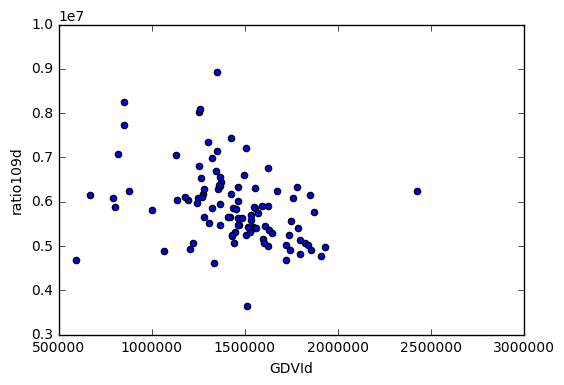

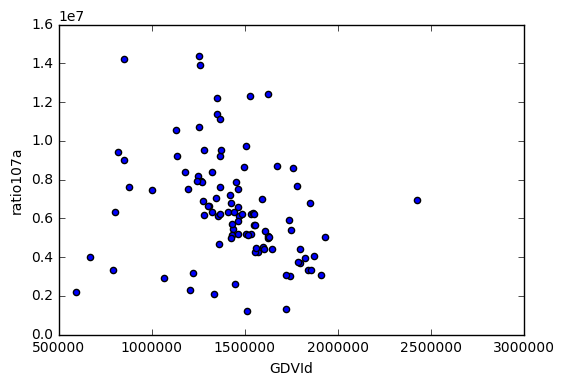

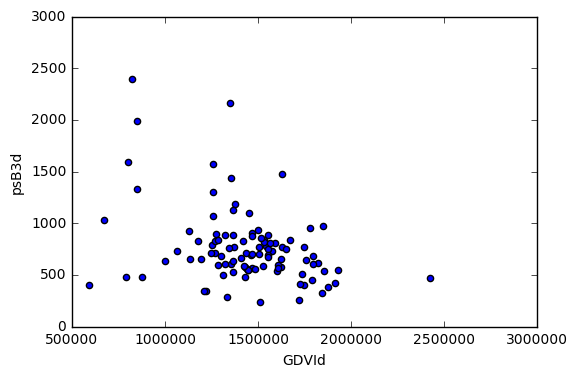

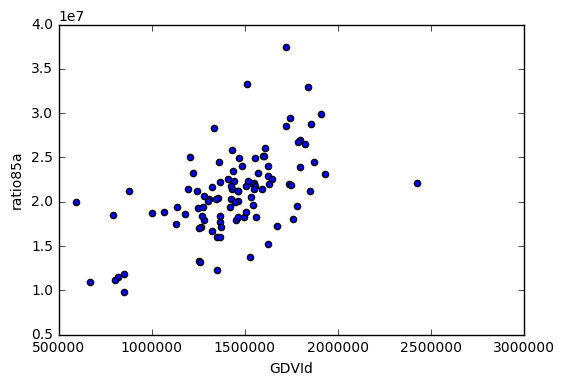

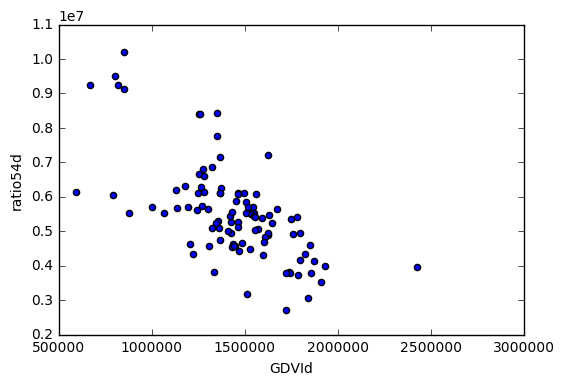

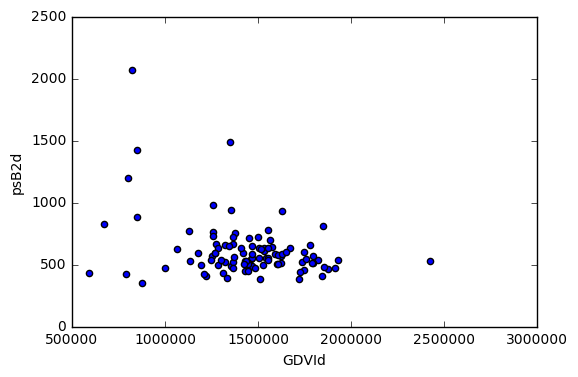

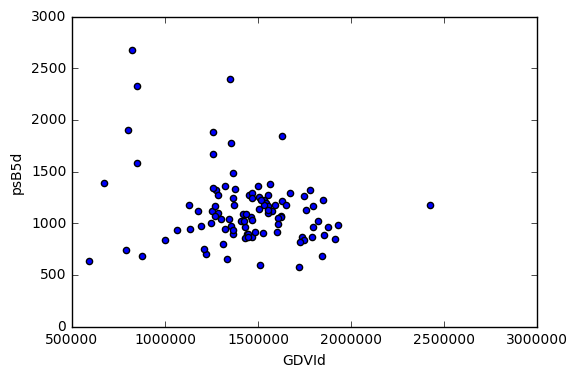

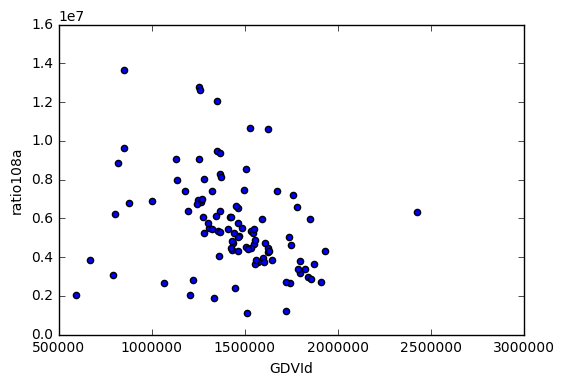

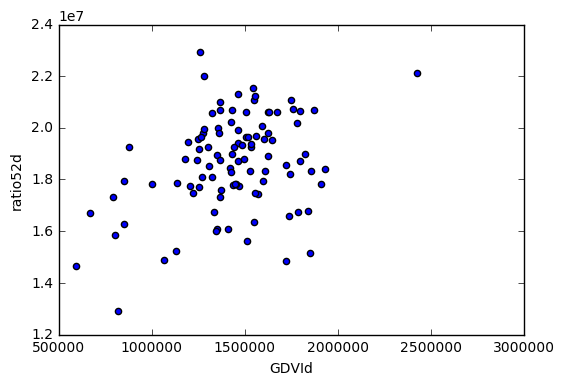

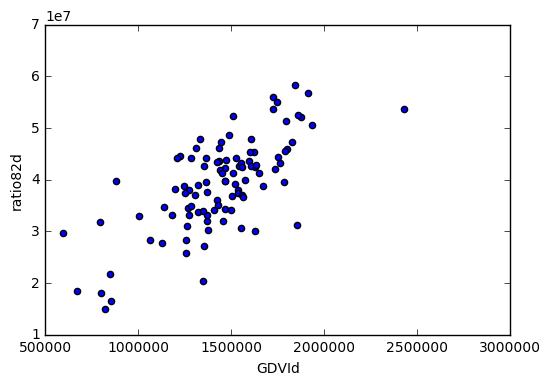

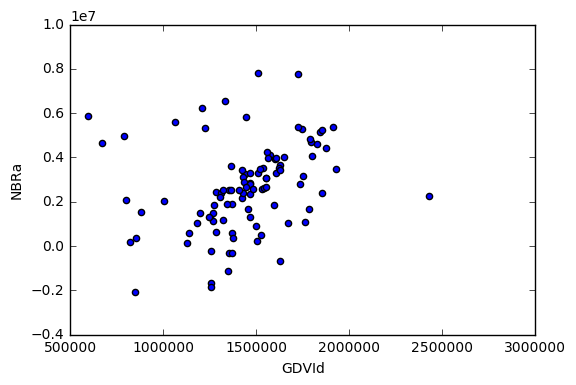

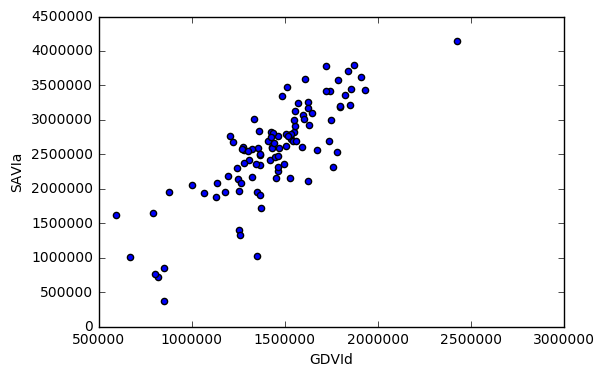

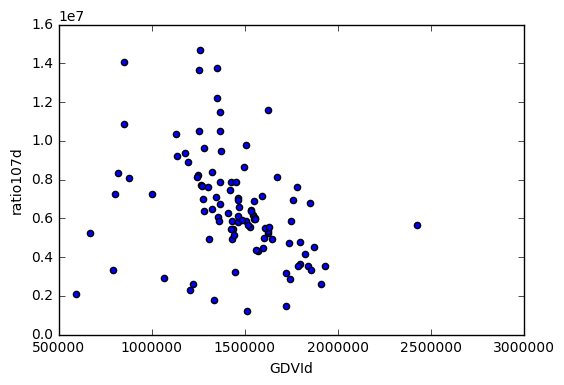

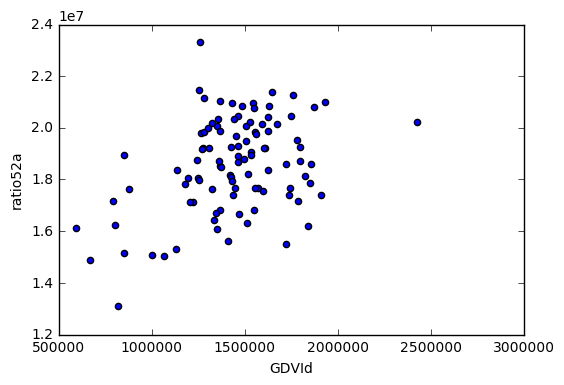

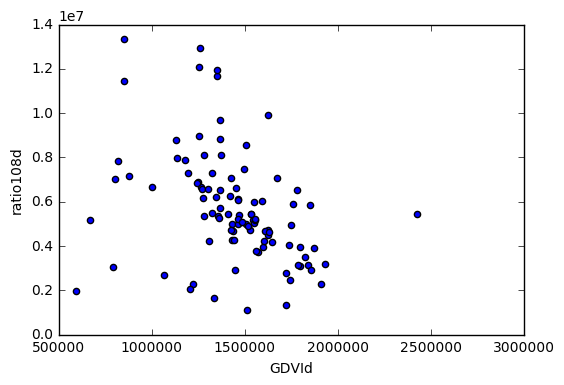

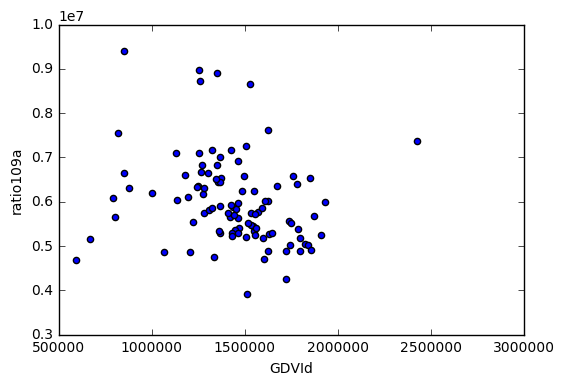

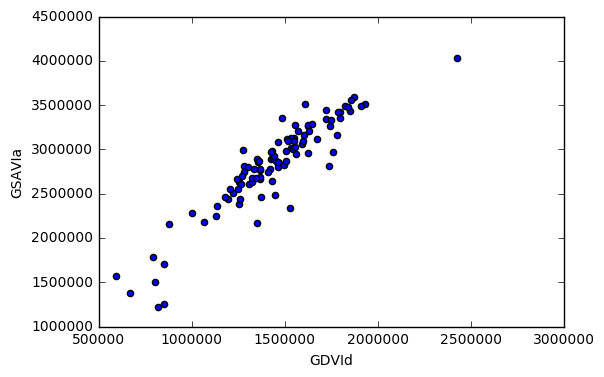

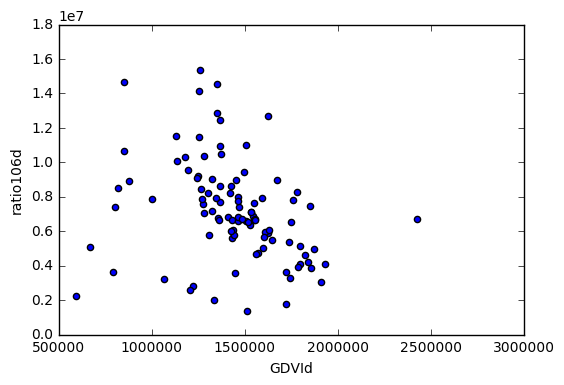

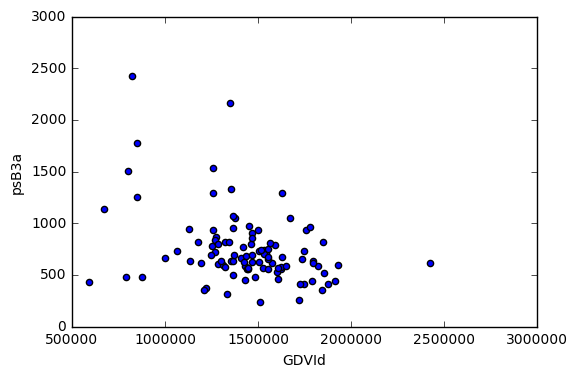

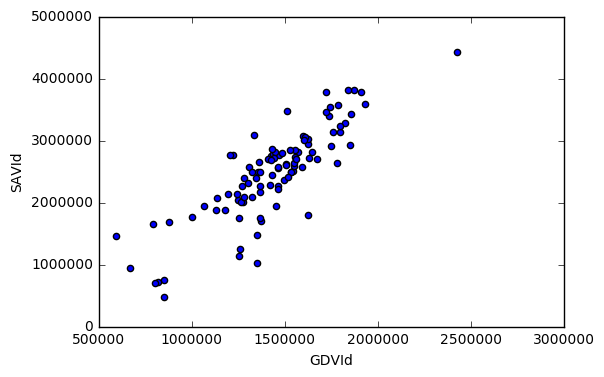

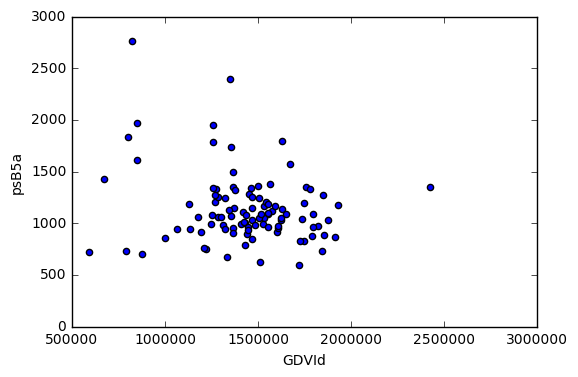

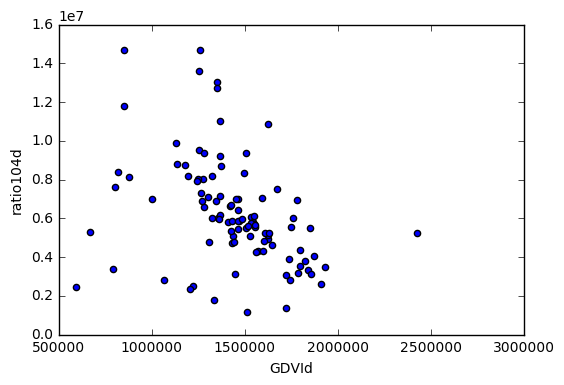

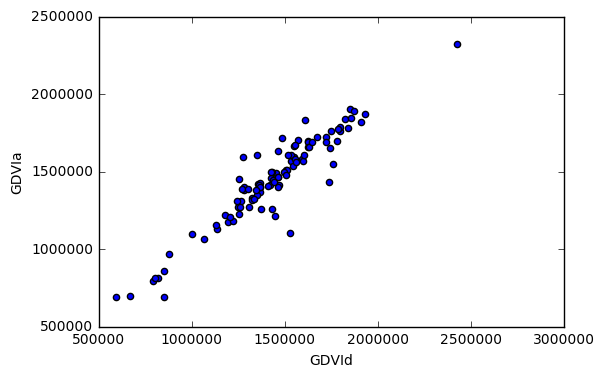

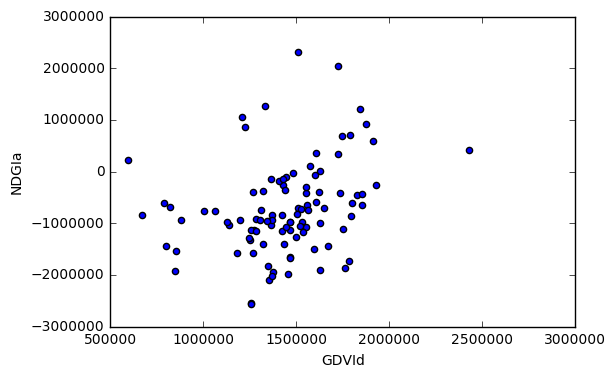

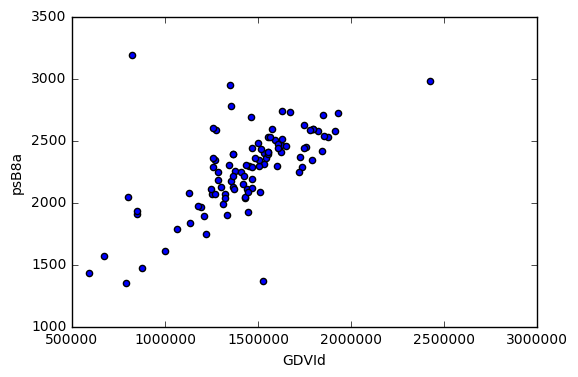

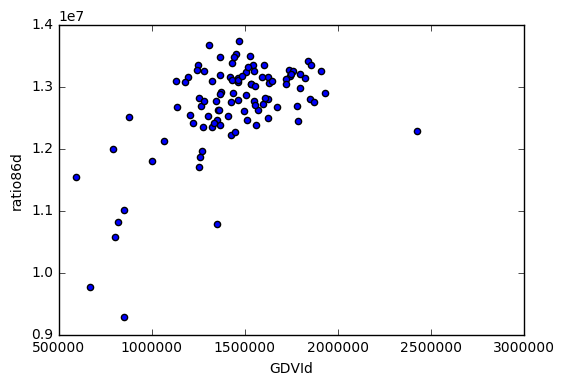

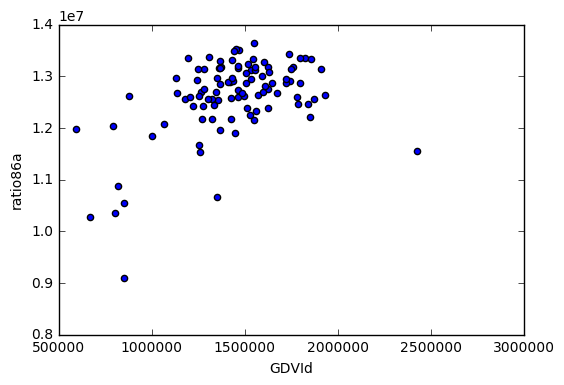

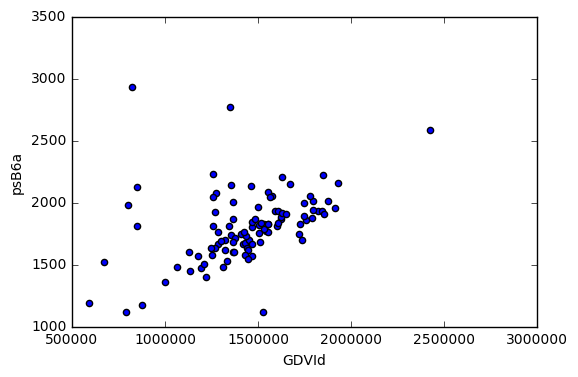

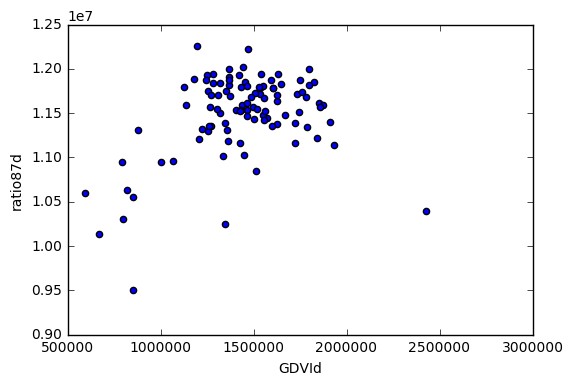

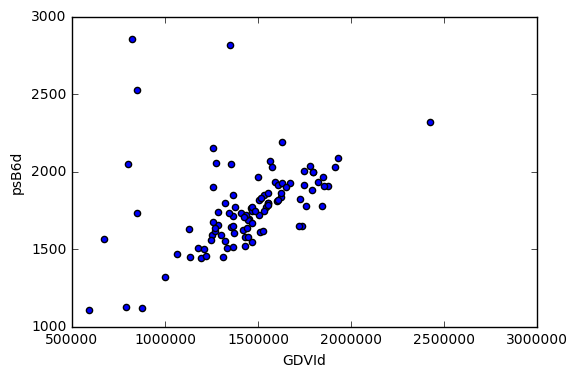

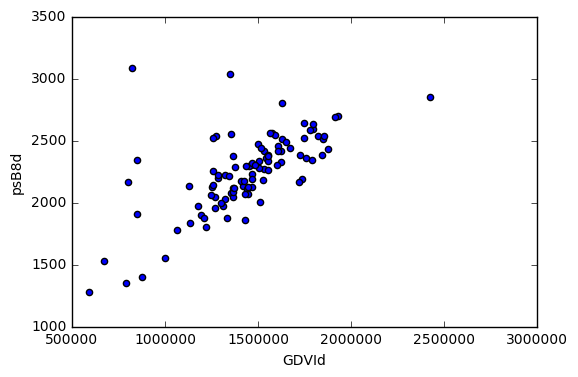

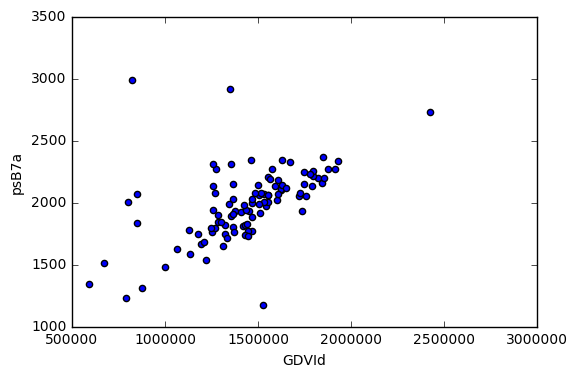

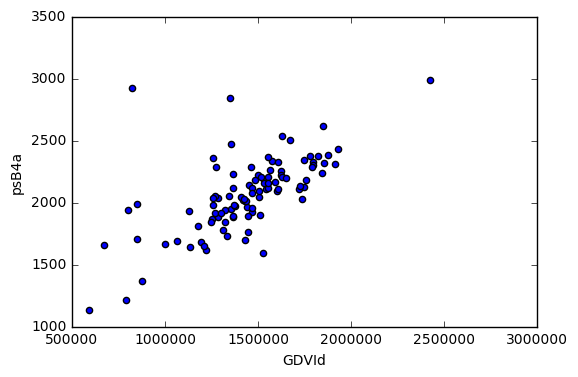

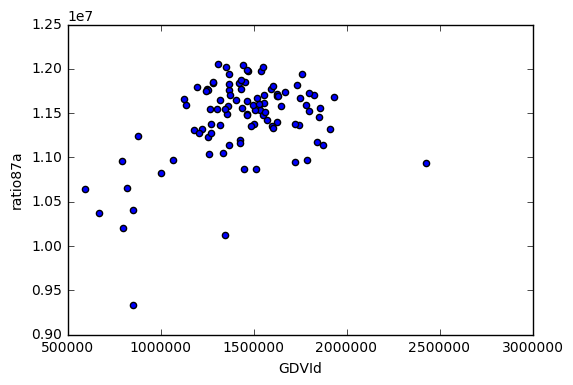

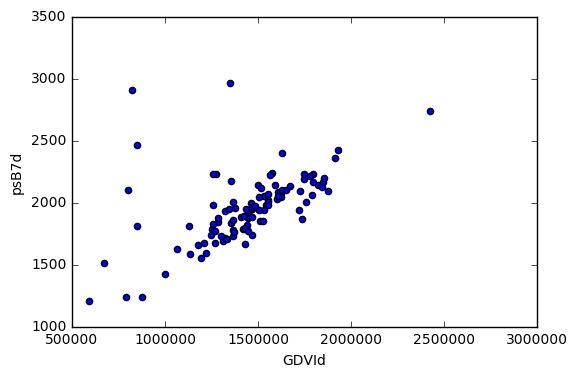

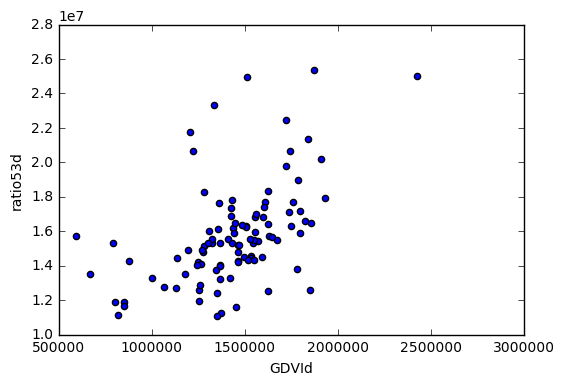

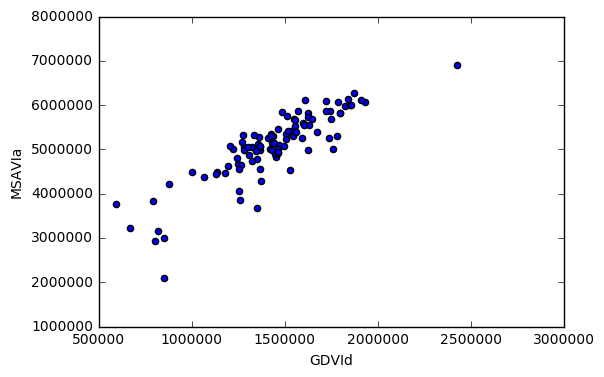

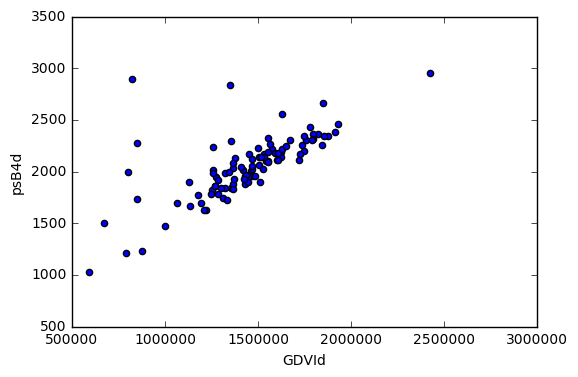

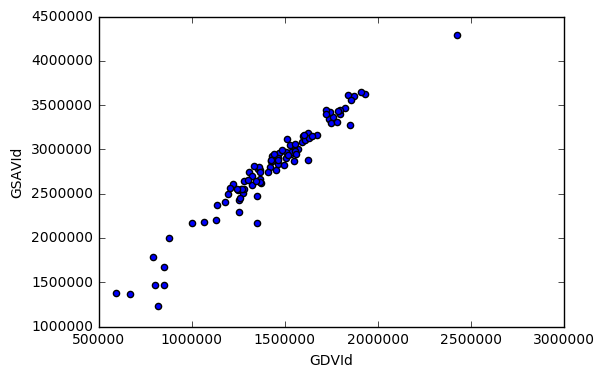

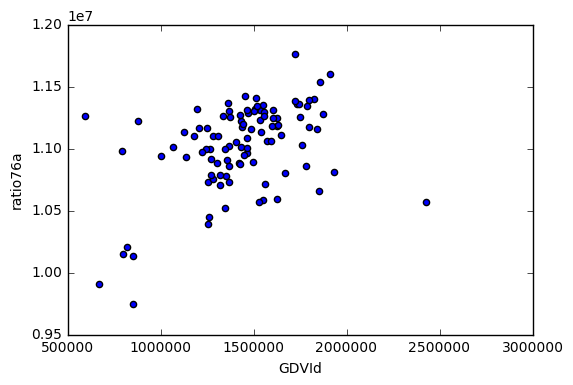

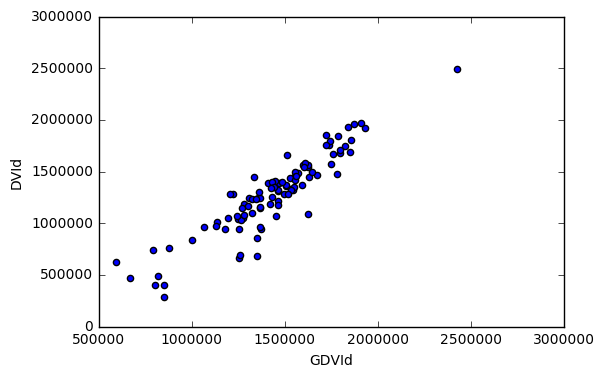

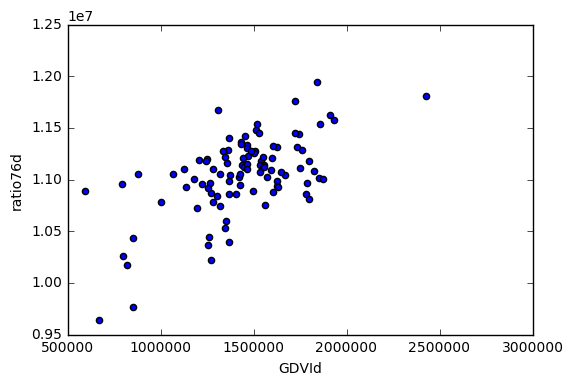

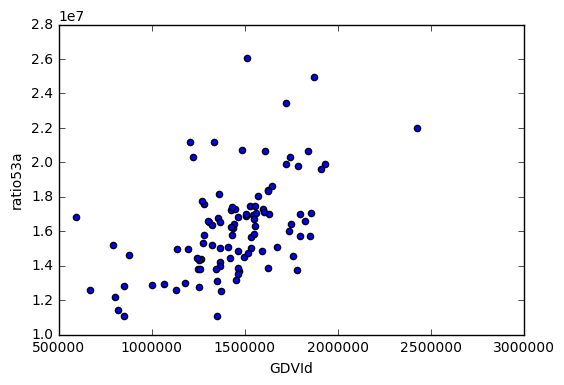

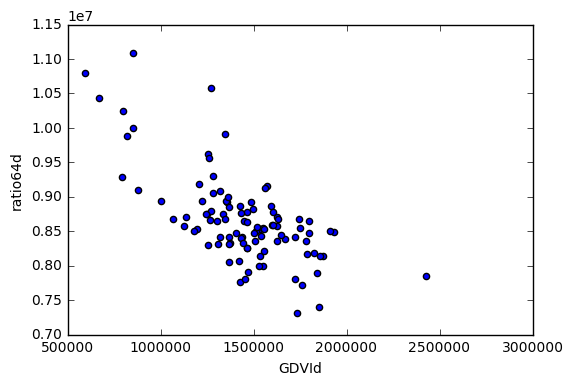

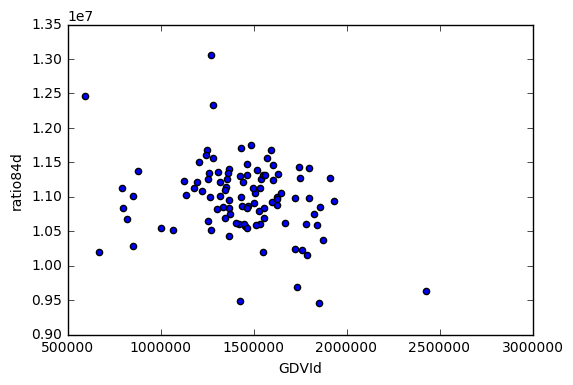

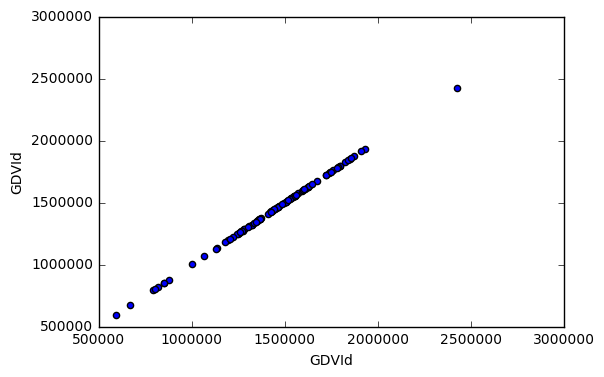

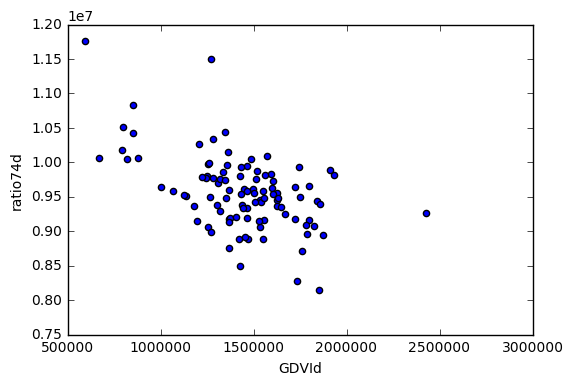

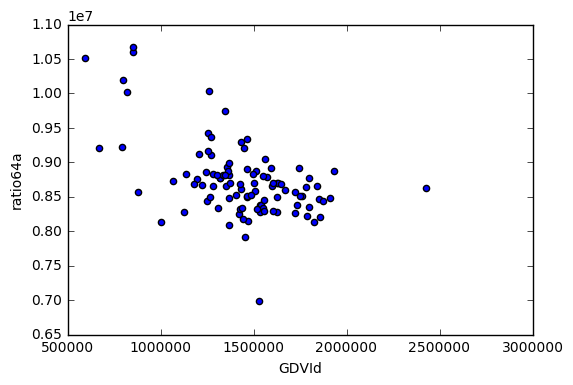

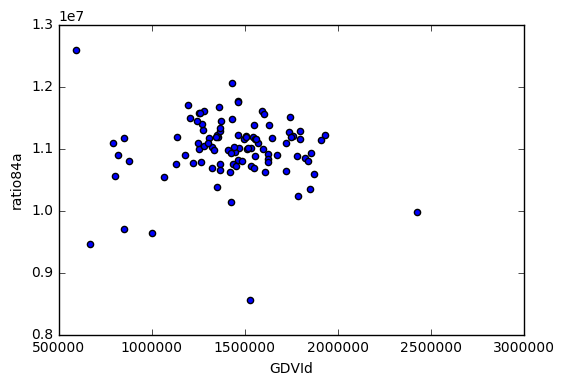

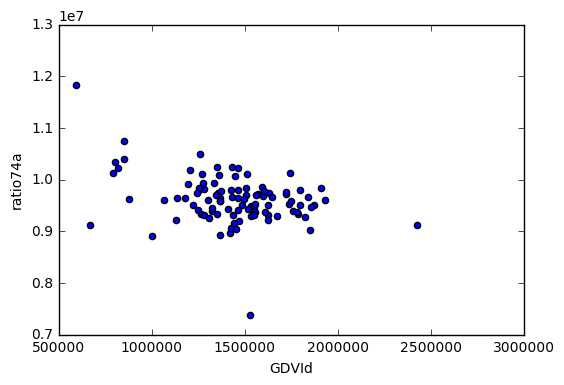

In [116]:
# plot up each of the variables to visually look for the band transformations 
for band in variables:
    
    df.plot.scatter('GDVId', band) 

In [117]:
# read in the training data to assess the relationship between the top 30 variables 
df = pd.read_csv('C:/Users/grants/code/old_growth/sen2_l8/zonal_stats/s2_10m_combined/sent2_training_data_10m_f.csv', header=0)
print (shape(df))

(148000, 143)


In [118]:
pred_vars = df[['CVIa','NDRE1d','CVId','CIrededged','ratio62a', 'ratio72a','ratio63a','ratio65a','ratio95d','GNDVIa','ratio95a',
             'psB9d','psB9a','ratio73a', 'ratio63d', 'ratio73d','ratio82a','NDRE2a','ratio92a','ratio98a',  'ratio43d',
             'ratio92d','ratio105a','ratio97a', 'NDIIa','ratio96a','psB10d','ratio103d','MSRa','ratio98d','psB10a',
             'ratio105d','ratio96d','ratio103a', 'GNDVId','ratio97d', 'ratio83a','ratio102a','ratio102d','ratio62d',
             'NDIId','ratio72d', 'ratio54a','ratio83d','ratio93d','ratio85d','ratio93a','ratio106a', 'NDGId', 'psB2a',
             'ratio109d', 'ratio107a', 'psB3d', 'ratio85a', 'ratio54d','psB2d', 'psB5d', 'ratio108a', 'ratio52d', 
             'ratio82d', 'NBRa','SAVIa', 'ratio107d', 'ratio52a', 'ratio108d', 'ratio109a', 'GSAVIa', 'ratio106d', 'psB3a', 
             'SAVId', 'psB5a','ratio104d','GDVIa','NDGIa','psB8a', 'ratio86d', 'ratio86a','psB6a', 'ratio87d', 'psB6d', 
             'psB8d','psB7a', 'psB4a', 'ratio87a', 'psB7d', 'ratio53d','MSAVIa', 'psB4d','GSAVId', 'ratio76a', 'DVId', 
             'ratio76d','ratio53a', 'ratio64d', 'ratio84d', 'GDVId','ratio74d','ratio64a', 'ratio84a', 'ratio74a']]

pred_vars.to_csv('predict_vars_correlation.csv')

In [119]:
import pandas as pd
import os

def corre(data,n):
    """
    This code performs the calculations and sorts the results. 
    """
    cor = data.corr().abs() # pearsons correlation coefficient
    cus = cor.unstack() # sort the data
    r_sort = cus.sort_values(kind="quicksort",ascending=False) # sort the data in accending order based on the highest r2 value
       
    return r_sort

def read_Data():
    """
    This reads in the csv file containing the test and train data and selects the colums for analysis.
    """
    df  = pd.read_csv('predict_vars_correlation.csv', header=0)
    df.dropna()
    data = df[df.columns[1:]]
    n = len(data.columns)
    
    return data,n
    
def mainRoutine():
    
    data,n = read_Data()
   
    r_sort = corre(data,n) 
    
    r_sort.to_csv('temp.csv')
    
    df = pd.read_csv('temp.csv',header=None)
    
    df.columns = ['b1','b2','corr'] # give the df headers
    
    df2 = df[df['b1'] != df['b2']] # remove all the self correlated data by comparing the band names in the two columns
      
    df2.to_csv('Var_corr_results_L5_all_vars.csv') # reads out the results with new header names
    
    os.remove('temp.csv') # delete the temp csv file
    
if __name__ == "__main__":
    mainRoutine()   

In [120]:
df2 = pd.read_csv('Var_corr_results_L5_all_vars.csv',header=0)
print (list(df2))
print (shape(df2))

['Unnamed: 0', 'b1', 'b2', 'corr']
(9900, 4)


In [121]:
# find all the highly correlated variables and get a list to produce a scatter matix 

h_corr = df2[df2['corr'] >= .95] #finds all correlation values % or greater
h_corr_list = h_corr['b1'].unique() # returns a list of the bands and prints them. 

newlist = []

for i in h_corr_list:
    newlist.append(i)
print (newlist)

['ratio73d', 'ratio63d', 'ratio73a', 'ratio63a', 'ratio83d', 'ratio107d', 'ratio106d', 'ratio83a', 'ratio107a', 'ratio106a', 'ratio97d', 'ratio96d', 'ratio62d', 'ratio72d', 'ratio96a', 'ratio97a', 'ratio62a', 'ratio72a', 'ratio43d', 'ratio108a', 'ratio108d', 'ratio104d', 'ratio85d', 'CIrededged', 'ratio98d', 'ratio82d', 'ratio98a', 'ratio82a', 'MSRa', 'NDRE2a', 'ratio85a', 'ratio65a', 'DVId', 'SAVId', 'NDRE1d', 'psB9a', 'psB9d', 'SAVIa', 'MSAVIa', 'psB3a', 'psB3d', 'NBRa', 'psB7d', 'psB6d', 'psB7a', 'psB6a', 'NDIIa', 'NDIId', 'psB5d', 'psB2a', 'psB2d', 'psB10d', 'psB10a', 'GSAVIa', 'GDVIa', 'psB8a', 'psB5a', 'ratio54a', 'psB8d', 'GDVId', 'GSAVId', 'ratio105a', 'ratio105d', 'ratio95d', 'ratio95a', 'GNDVId', 'GNDVIa', 'psB4a', 'ratio53d', 'psB4d', 'ratio92d', 'ratio92a', 'NDGId', 'NDGIa']


In [122]:
# Get the unique band values from b1 column and use numpy to list the unique predictor variables that are highly linear correlated
unique = h_corr.b1.values
print (np.unique(unique))
print (len(np.unique(unique)))

['CIrededged' 'DVId' 'GDVIa' 'GDVId' 'GNDVIa' 'GNDVId' 'GSAVIa' 'GSAVId'
 'MSAVIa' 'MSRa' 'NBRa' 'NDGIa' 'NDGId' 'NDIIa' 'NDIId' 'NDRE1d' 'NDRE2a'
 'SAVIa' 'SAVId' 'psB10a' 'psB10d' 'psB2a' 'psB2d' 'psB3a' 'psB3d' 'psB4a'
 'psB4d' 'psB5a' 'psB5d' 'psB6a' 'psB6d' 'psB7a' 'psB7d' 'psB8a' 'psB8d'
 'psB9a' 'psB9d' 'ratio104d' 'ratio105a' 'ratio105d' 'ratio106a'
 'ratio106d' 'ratio107a' 'ratio107d' 'ratio108a' 'ratio108d' 'ratio43d'
 'ratio53d' 'ratio54a' 'ratio62a' 'ratio62d' 'ratio63a' 'ratio63d'
 'ratio65a' 'ratio72a' 'ratio72d' 'ratio73a' 'ratio73d' 'ratio82a'
 'ratio82d' 'ratio83a' 'ratio83d' 'ratio85a' 'ratio85d' 'ratio92a'
 'ratio92d' 'ratio95a' 'ratio95d' 'ratio96a' 'ratio96d' 'ratio97a'
 'ratio97d' 'ratio98a' 'ratio98d']
74


In [91]:
# variables higly correlated in order of importance

'CVIa','NDRE1d','CVId',CIrededged,'ratio62a', ratio72a,'ratio63a',ratio65a,'ratio95d','GNDVIa',ratio95a,'psB9d',psB9a,ratio73a,
ratio63d, ratio73d,ratio82a,'NDRE2a','ratio92a','ratio98a',ratio43d,ratio92d,'ratio105a',ratio97a, NDIIa,ratio96a,psB10d,
'ratio103d',MSRa,ratio98d,'psB10a',ratio105d,ratio96d,'ratio103a', GNDVId,ratio97d, ratio83a,'ratio102a','ratio102d','ratio62d',
'NDIId',ratio72d, ratio54a,ratio83d,'ratio93d',ratio85d,'ratio93a',ratio106a, 'NDGId', 'psB2a','ratio109d', ratio107a, 'psB3d',
ratio85a, 'ratio54d',psB2d, psB5d, ratio108a, 'ratio52d', 

ratio82d, NBRa,'SAVIa', 'ratio107d', 'ratio52a', 'ratio108d', 'ratio109a', 'GSAVIa', 'ratio106d', psB3a, 

SAVId, 'psB5a','ratio104d','GDVIa',NDGIa,'psB8a', 'ratio86d', 'ratio86a','psB6a', 'ratio87d', 'psB6d', 

'psB8d','psB7a', 'psB4a', 'ratio87a', 'psB7d', 'ratio53d',MSAVIa, 'psB4d','GSAVId', 'ratio76a', 'DVId', 

'ratio76d','ratio53a', 'ratio64d', 'ratio84d', 'GDVId','ratio74d','ratio64a', 'ratio84a', 'ratio74a'

In [ ]:
# list of the variables highly corrrelated that were removed and the corresponding band

'CIrededged',NDRE1d #
'ratio85d',NDRE1d #
'ratio72a',ratio62a #
'ratio82a',ratio62a #
'ratio73a',ratio63a #
'ratio83a',ratio63a #
'MSRa',ratio63a #
'ratio63d',ratio63a #
'ratio73d',ratio63a #
'ratio83d',ratio63a #
'ratio43d',ratio63a #
'ratio65a',ratio63a #
'ratio95a', ratio95d #
'GNDVId', GNDVIa #
'psB9a',psB9d # 
'psB10d',psB9d #
'ratio85a',NDRE2a #
'ratio54a',NDRE2a #
'ratio92d',ratio92a # 

'ratio97a', ratio98a#
'ratio96a',ratio98a#
'ratio98d',ratio98a#
'ratio106a',ratio98a#
'NBRa',ratio98a#
'ratio107a',ratio98a#
'NDIIa',ratio98a#
'ratio97d',ratio98a#
'ratio108a',ratio98a#
'ratio96d',ratio98a#
'ratio105d',ratio105a
'ratio72d',ratio62d
'ratio82d',ratio62d
'NDGIa',NDGId#
'psB2d',psB2a
'psB5d',psB3d
'psB3a',psB3d
'SAVId',SAVIa
'MSAVIa',SAVIa

'ratio108d',
'ratio106d', 
'ratio104d',
'GDVIa',
'psB7a',
'psB4a', 
'psB7d',
'psB4d',
'DVId',
'GDVId',

In [179]:
# work throught the list of important variables from the least important variable removing the least important of the two high correlated variables

data3 = h_corr[h_corr['b1'] =='ratio74a']
data3

,Unnamed: 0,b1,b2,corr


In [180]:
final_list = df[['perc99_1','CVIa','NDRE1d','CVId','ratio62a', 'ratio63a','ratio95d','GNDVIa','psB9d','NDRE2a','ratio92a',
                 'ratio98a','ratio105a','ratio103d','psB10a','ratio103a', 'ratio102a','ratio102d','ratio62d','NDIId', 'ratio93d',
                 'ratio93a', 'NDGId', 'psB2a', 'ratio109d', 'psB3d','ratio54d',   'ratio52d', 'SAVIa', 'ratio107d','ratio52a', 
                 'ratio109a', 'GSAVIa','psB5a','psB8a','ratio86d', 'ratio86a','psB6a', 'ratio87d', 'psB6d','psB8d', 'ratio87a',
                 'ratio53d', 'GSAVId', 'ratio76a','ratio76d','ratio53a', 'ratio64d', 'ratio84d', 'ratio74d','ratio64a', 
                 'ratio84a', 'ratio74a']]
print (len(list(final_list)))

53


In [181]:
final_list.to_csv('s2_10m_h99_pred_vars_stage2.csv')

In [119]:
ls

 Volume in drive C is System
 Volume Serial Number is 12FA-D4D7

 Directory of C:\Users\grants\code\old_growth\sen2_l8\zonal_stats\s2_10m_combined\stage01_02\h99

25/01/2019  03:13 PM    <DIR>          .
25/01/2019  03:13 PM    <DIR>          ..
25/01/2019  10:42 AM    <DIR>          .ipynb_checkpoints
23/01/2019  12:50 PM            10,600 FeatureImportance_band_n512.csv
23/01/2019  12:50 PM             6,342 FeatureImportance_Band_Score_n512.csv
23/01/2019  12:50 PM            24,320 FeatureImportance_Score_n512.csv
23/01/2019  12:50 PM               703 IterateStats_n512.csv
25/01/2019  03:12 PM           180,396 n_trees_h99_analysis_stats_all_vars_S2_10m.ipynb
25/01/2019  01:34 PM       179,465,636 predict_vars_correlation.csv
23/01/2019  12:50 PM        15,732,562 PredictedANDobserved_n512.csv
25/01/2019  03:13 PM       113,340,768 s2_10m_h99_pred_vars_stage2_allvars.csv
25/01/2019  10:40 AM                92 S2_10m_n_trees_results_h99_CanopyHeight.csv
23/01/2019  12:50 PM        

In [120]:
print (list(final_list))

['perc99_1', 'CVIa', 'ratio65d', 'CVId', 'psB9a', 'CIgreena', 'NDRE1a', 'ratio63a', 'NDIIa', 'GNDVIa', 'psB10d', 'ratio109d', 'NBRd', 'ratio42d', 'ratio109a', 'ratio54a', 'ratio52d', 'NDGId', 'ratio54d', 'ratio52a', 'GSAVIa', 'psB5d', 'psB2a', 'psB8a', 'SAVIa', 'psB6a', 'psB8d', 'psB6d', 'ratio53d', 'ratio64d', 'GSAVId', 'ratio64a', 'ratio53a', 'GDVId', 'MSAVId']
